In [31]:
''' Required packages. Use python3 -m pip install xxx for all the packages. '''
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.font_manager as fm
from matplotlib import pyplot as plt
import easypyplot

In [32]:
''' Plot parameters. Change only if you want to resize the graph, etc. '''
fig_bar_width = 0.7
fig_dims = (10, 2.5)
fig_label_fontsize = 20
xy_label_size = 20
ft = fm.FontProperties('Times New Roman')
ft.set_size(fig_label_fontsize)

fig_path = '../../4.4/'
fig_name = '4.4 technique breakdown'

In [33]:
csv_path = 'CCEH.csv'
workload_list = ['CCEH']
scheme_list = ['single-channel', 'multi-channel', '+IGC', '+HAM']
workload_dict = {item: item for item in workload_list}
repl_scheme_dict = {item: item for item in scheme_list}

repl_title = 'Throughput (Mops)'
repl_name = 'CCEH'
repl_ylim = (10, 40)
repl_yticks = list(np.arange(repl_ylim[0], repl_ylim[1]+0.01, 10))
repl_bar_colors = [easypyplot.color.COLOR_SET[i] for i in [3, 2, 1, 0]]
assert len(repl_bar_colors) == len(repl_scheme_dict)

''' Load data from file. '''
csv_hd = pd.read_csv(csv_path, sep=',')
repl_xlabels = []
repl_xticks = []
repl_data_2darr = []
xtick = -1
for idx, row in csv_hd.iterrows():
    workload_fullname = row[0]
    if any(workload in workload_fullname for workload in workload_list):
        row_value = []
        for col in row.keys():
            if any(scheme in col for scheme in repl_scheme_dict):
                row_value.append(row[col])
        repl_data_2darr.append(row_value)
        repl_xlabels.append(workload_fullname)
        xtick += 1
        repl_xticks.append(xtick)
assert len(repl_data_2darr) == len(repl_xlabels) == len(repl_xticks)

pprint(repl_data_2darr)

[[18.88, 29.01, 35.28, 39.49]]


In [34]:
sbsize_csv_path = 'FF.csv'
workload_list = ['FF']
scheme_list = ['single-channel', 'multi-channel', '+IGC', '+HAM']
workload_dict = {item: item for item in workload_list}
sbsize_scheme_dict = {item: item for item in scheme_list}

sbsize_title = 'Norm. Performance'
sbsize_name = 'FF'
sbsize_ylim = (2, 6)
sbsize_yticks = list(np.arange(sbsize_ylim[0], sbsize_ylim[1]+0.01, 1))
sbsize_bar_colors = [easypyplot.color.COLOR_SET[i] for i in [3, 2, 1, 0]]
assert len(sbsize_bar_colors) == len(sbsize_scheme_dict)

''' SBSize: Load data from file. '''
csv_hd = pd.read_csv(sbsize_csv_path, sep=',')
sbsize_xlabels = []
sbsize_xticks = []
sbsize_data_2darr = []
xtick = -1
for idx, row in csv_hd.iterrows():
    workload_fullname = row[0]
    if any(workload in workload_fullname for workload in workload_list):
        row_value = []
        for col in row.keys():
            if any(scheme in col for scheme in sbsize_scheme_dict):
                row_value.append(row[col])
        sbsize_data_2darr.append(row_value)
        sbsize_xlabels.append(workload_fullname)
        xtick += 1
        sbsize_xticks.append(xtick)
assert len(sbsize_data_2darr) == len(sbsize_xlabels) == len(sbsize_xticks)

pprint(sbsize_data_2darr)

[[3.0, 3.48, 3.4, 5.1]]


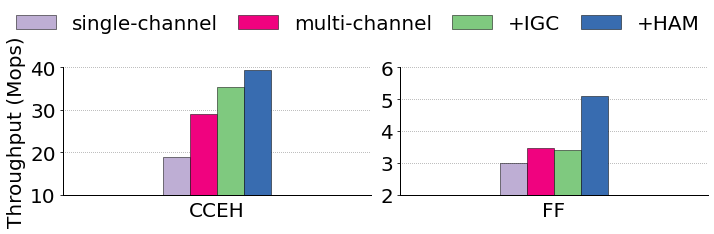

In [35]:
''' Two-level Repl: Ploting script '''
pp, fig = easypyplot.pdf.plot_setup(fig_name, fig_dims)
repl_ax = fig.add_subplot(1, 2, 1)
easypyplot.format.turn_off_box(repl_ax)
repl_h = easypyplot.barchart.draw(
    repl_ax, repl_data_2darr,
    width=fig_bar_width,
    breakdown=False,
    group_names=repl_xlabels,
    xticks=repl_xticks,
    xticklabelfontsize=fig_label_fontsize,
    xticklabelrotation=0,
    # prop=ft,
    colors=repl_bar_colors)
''' x axis '''
repl_ax.set_xlim([repl_ax.get_xticks()[0] - 1, repl_ax.get_xticks()[-1] + 1])
repl_ax.set_xticks(repl_xticks)
repl_ax.set_xticklabels(repl_xlabels, fontsize=fig_label_fontsize, fontproperties=ft)
repl_ax.xaxis.set_ticks_position('none') # Comment this and the next line for visible ticks
# repl_ax.tick_params(direction='in') # [in, out, inout]
# repl_ax.set_xlabel(repl_title)
''' y axis '''
repl_ax.yaxis.grid(True)
repl_ax.set_ylim(repl_ylim)
repl_ax.set_yticks(repl_yticks)
repl_ax.set_ylabel(repl_title, multialignment='center', fontproperties=ft)
repl_ax.tick_params(labelsize=xy_label_size)
# repl_ax.set_xlabel('(a) Two-level Replacement Policy', fontproperties=ft)

''' sbsize plot '''
sbsize_ax = fig.add_subplot(1, 2, 2)
easypyplot.format.turn_off_box(sbsize_ax)
sbzsize_h = easypyplot.barchart.draw(
    sbsize_ax, sbsize_data_2darr,
    width=fig_bar_width,
    breakdown=False,
    group_names=sbsize_xlabels,
    xticks=sbsize_xticks,
    xticklabelfontsize=fig_label_fontsize,
    xticklabelrotation=0,
    # prop=ft,
    colors=sbsize_bar_colors)
''' x axis '''
sbsize_ax.set_xlim([sbsize_ax.get_xticks()[0] - 1, sbsize_ax.get_xticks()[-1] + 1])
sbsize_ax.set_xticks(sbsize_xticks)
sbsize_ax.set_xticklabels(sbsize_xlabels, fontsize=fig_label_fontsize, fontproperties=ft)
sbsize_ax.xaxis.set_ticks_position('none') # Comment this and the next line for visible ticks
# repl_ax.tick_params(direction='in') # [in, out, inout]
''' y axis '''
sbsize_ax.yaxis.grid(True)
sbsize_ax.set_ylim(sbsize_ylim)
sbsize_ax.set_yticks(sbsize_yticks)
sbsize_ax.tick_params(labelsize=xy_label_size)
# sbsize_ax.set_ylabel('Norm. Performance', multialignment='center', fontproperties=ft)
# sbsize_ax.set_xlabel('(b) Super-block Size', fontproperties=ft)
''' legend '''
sbsize_legend = [sbsize_scheme_dict[item] for item in sbsize_scheme_dict]
fig.legend(sbzsize_h, sbsize_legend, loc='upper right', bbox_to_anchor=(1, 1.3),
        ncol=4, frameon=False, prop=ft, columnspacing=1, labelspacing=0)


''' last resize '''
# fig.subplots_adjust(hspace=1)
plt.tight_layout()
# easypyplot.format.resize_ax_box(repl_ax, hratio=0.8)
# easypyplot.format.resize_ax_box(sbsize_ax, hratio=0.8)
# easypyplot.format.resize_ax_box(stagesize_ax, hratio=0.8)
# easypyplot.format.resize_ax_box(cfr_ax, hratio=0.8)


In [36]:
''' Save figures'''
fig.savefig(fig_path + fig_name+'.pdf', format="pdf", bbox_inches = 'tight')
# easypyplot.pdf.plot_teardown(pp) # it generates wierd chopped figures